In [2]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

# Linear Algebra and Linear Systems

A lot of problems in statistical computing can be described mathematically using linear algebra.  This lecture is meant to serve as a review of concepts you have covered in linear algebra courses.

## Simultaneous Equations

Consider a set of $m$ linear equations in $n$ unknowns:




\begin{align*}
a_{11} x_1 + &a_{12} x_2& +& ... + &a_{1n} x_n &=& b_1\\
\vdots  && &&\vdots &= &\vdots\\
a_{m1} x_1 + &a_{m2} x_2& +& ... + &a_{mn} x_n &=&b_m 
\end{align*}


We can let:

\begin{align*}
    A=\left[\begin{matrix}a_{11}&\cdots&a_{1n}\\
               \vdots & &\vdots\\
               a_{m1}&\cdots&a_{mn}\end{matrix}\right] & &
    x = \left[\begin{matrix}x_1 \\
               \vdots\\
               x_n\end{matrix}\right] & \;\;\;\;\textrm{   and } &
    b =  \left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
\end{align*}


And re-write the system:
    
$$ Ax = b$$

This reduces the problem to a matrix equation, and now solving the system amounts to finding $A^{-1}$ (or sort of).  Certain properies of the matrix $A$ yield important information about the linear system.

### Underdetermined System ($m<n$)

When $m<n$, the linear system is said to be *underdetermined*.  I.e. there are fewer equations than unknowns.  In this case, there are either no solutions (if the system is *inconsistent*) or infinite solutions.  A unique solution is not possible.

### Overdetermined System

When $m>n$, the system may be *overdetermined*.  In other words, there are more equations than unknowns.  They system could be inconsistent, or some of the equations could be redundant. Statistically, you can translate these situations to 'least squares solution' or 'overparametrized'.

There are many techniques to solve and analyze linear systems.  Our goal is to understand the theory behind many of the built-in functions, and how they *efficiently* solve systems of equations.

First, let's review some linear algebra topics:

## Linear Independence

A collection of vectors $v_1,...,v_n$ is said to be *linearly independent* if

$$c_1v_1 + \cdots c_nv_n = 0$$
$$\iff$$
$$c_1=\cdots=c_n=0$$

In other words, any linear combination of the vectors that results in a zero vector is trivial.

Another interpretation of this is that no vector in the set may be expressed as a linear combination of the others.  In this sense, linear independence is an expression of non-redundancy in a set of vectors.


Fact: Any linearly independent set of $n$ vectors spans an $n$-dimensional space. (I.e. the collection of all possible linear combinations is $\mathbb{R}^n$.)  Such a set of vectors is said to be a *basis* of $\mathbb{R}^n$.  Another term for basis is *minimal spanning set*.

#### What does that have to do with linear systems?

**A LOT!!**

* If $A$ is an $m\times n$ matrix and $m>n$, if all $m$ rows are linearly independent, then the system is *overdetermined* and *inconsistent*.  The system cannot be solved exactly.  This is the usual case in data analysis, and why least squares is so important.
 
* If $A$ is an $m\times n$ matrix and $m<n$, if all $m$ rows are linearly independent, then the system is *underdetermined* and there are *infinite* solutions.

* If $A$ is an $m\times n$ matrix and some of its rows are linearly dependent, then the system is *reducible*.  We can get rid of some equations.

* If $A$ is a square matrix and its rows are linearly independent, the system has a unique solution. ($A$ is invertible.)


Linear algebra has a whole lot more to tell us about linear systems, so we'll review a few basics.

## Norms and Distance of Vectors

Recall that the 'norm' of a vector $v$, denoted $||v||$ is simply its length.  For a vector with components 
$$v = \left(v_1,...,v_n\right)$$
the norm of $v$ is given by:
    
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$

The distance between two vectors is the length of their difference:
    
$$d(v,w) = ||v-w||$$

#### Examples

In [4]:
import numpy as np
from scipy import linalg


# norm of a vector

v = np.array([1,2])
linalg.norm(v)

2.2361

In [5]:
# distance between two vectors

w = np.array([1,1])
linalg.norm(v-w)

1.0000

### Inner Products

Inner products are closely related to norms and distance.  The (standard) inner product of two $n$ dimensional vectors $v$ and $w$ is given by:

$$<v,w> = v_1w_1+...+v_nw_n$$

I.e. the inner product is just the sum of the product of the components.  Certain 'special' matrices also define inner products, and we will see some of those later.

Any inner product determines a norm via:

$$||v|| = <v,v>^{\frac12}$$

There is a more abstract formulation of an inner product, that is useful when considering more general vector spaces, especially function vector spaces:

An inner product on a vector space $V$ is a symmetric, positive definite, bilinear form.

There is also a more abstract definition of a norm - a norm is function from a vector space to the real numbers, that is positive definite, absolutely scalable and satisfies the triangle inequality.

What is important here is not to memorize these definitions - just to realize that 'norm' and 'inner product' can be defined for things that are not tuples in $\mathbb{R}^n$. (In particular, they can be defined on vector spaces of *functions*).

#### Example

In [6]:
v.dot(w)

3

### Outer Products

Note that the inner product is just matrix multiplication of a $1\times n$ vector with an $n\times 1$ vector.  In fact, we may write:

$$<v,w> = v^tw$$

The *outer product* of two vectors is just the opposite. It is given by:

$$v\otimes w = vw^t$$

Note that I am considering $v$ and $w$ as *column* vectors.  The result of the inner product is a *scalar*. The result of the outer product is a *matrix*.

#### Example

In [7]:
np.outer(v,w)

array([[1, 1],
       [2, 2]])

**Extended example**: the covariance matrix is an outer proudct.

In [8]:
import numpy as np

# We have n observations of p variables 
n, p = 10, 4
v = np.random.random((p,n))

In [9]:
# The covariance matrix is a p by p matrix
np.cov(v)

array([[ 0.1055, -0.0437,  0.0352, -0.0152],
       [-0.0437,  0.055 , -0.0126,  0.0324],
       [ 0.0352, -0.0126,  0.1016,  0.0552],
       [-0.0152,  0.0324,  0.0552,  0.1224]])

In [10]:
# From the definition, the covariance matrix 
# is just the outer product of the normalized 
# matrix where every variable has zero mean
# divided by the number of degrees of freedom
w = v - v.mean(1)[:, np.newaxis]
w.dot(w.T)/(n - 1)

array([[ 0.1055, -0.0437,  0.0352, -0.0152],
       [-0.0437,  0.055 , -0.0126,  0.0324],
       [ 0.0352, -0.0126,  0.1016,  0.0552],
       [-0.0152,  0.0324,  0.0552,  0.1224]])

## Trace and Determinant of Matrices

The trace of a matrix $A$ is the sum of its diagonal elements.  It is important for a couple of reasons:

* It is an *invariant* of a matrix under change of basis (more on this later).
* It defines a matrix norm (more on that later)

The determinant of a matrix is defined to be the alternating sum of permutations of the elements of a matrix.  Let's not dwell on that though. It is important to know that the determinant of a $2\times 2$ matrix is

$$\left|\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right| = a_{11}a_{22} - a_{12}a_{21}$$

This may be extended to an $n\times n$ matrix by minor expansion.  I will leave that for you to google.  We will be computing determinants using tools such as:

``np.linalg.det(A)``

What is most important about the determinant:

* Like the trace, it is also invariant under change of basis
* An $n\times n$ matrix $A$ is invertible $\iff$ det$(A)\neq 0$ 
* The rows(columns) of an $n\times n$ matrix $A$ are linearly independent $\iff$ det$(A)\neq 0$

In [11]:
n = 6
M = np.random.randint(100,size=(n,n))
print(M)
np.linalg.det(M)

[[61 36 46 92 50 76]
 [83 63 14 97 17 62]
 [17 26 12 94 61 50]
 [66  9 11 73  1 13]
 [37 98 82 69  3 65]
 [51 15  7 25 85 72]]


36971990469.0001

## Column space, Row space, Rank and Kernel

Let $A$ be an $m \times n$ matrix.  We can view the columns of $A$ as vectors, say $a_1, \dots,, a_n$. The space of all linear combinations of the $a_i$ are the *column space* of the matrix $A$.  Now, if $a_1, \dots ,a_n$ are *linearly independent*, then the column space is of dimension $n$.  Otherwise, the dimension of the column space is the size of the maximal set of linearly independent $a_i$.  Row space is exactly analogous, but the vectors are the *rows* of $A$.

The *rank* of a matrix *A* is the dimension of its column space - and - the dimension of its row space.  These are equal for any matrix.  Rank can be thought of as a measure of non-degeneracy of a system of linear equations, in that it is the *dimension of the image of the linear transformation* determined by $A$. 

The *kernel* of a matrix *A* is the dimension of the space mapped to zero under the linear transformation that $A$ represents. The dimension of the kernel of a linear transformation is called the *nullity*. 

Index theorem: For an $m\times n$ matrix $A$, 

rank($A$) + nullity($A$) = $n$.


## Matrices as Linear Transformations



Let's consider: what does a matrix *do* to a vector?  Matrix multiplication has a *geometric* interpretation.  When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix *transforms* one vector into another vector.  This is known as a *linear transformation*.

Important Facts: 

* Any matrix defines a linear transformation
* The matrix form of a linear transformation is NOT unique
* We need only define a transformation by saying what it does to a *basis*

Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$BAB^{-1}$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

This is what we do in PCA.  We express the matrix in a basis of eigenvectors (more on this later).

#### Example:

Let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1=(1,3)$ and $v_2=(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$


Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$BAB^{-1}$$

In [24]:


A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1) 
                              
# new basis vectors
v1 = np.array([1,3])         
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))   
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# transform e1 under change of coordinates
T = B.dot(A.dot(B_inv))        # B A B^{-1}  
coeffs = T.dot(e1)

print(coeffs[0]*v1 + coeffs[1]*v2)




[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[  1.0000e+00   0.0000e+00]
 [  5.5511e-17   1.0000e+00]]
[ 1.1818  0.5455]


In [13]:
def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

In [14]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,1],[3,1]])

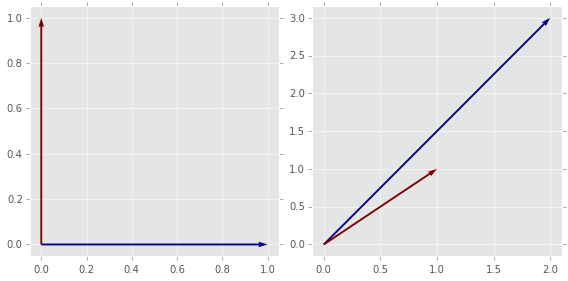

In [15]:
# Here is a simple plot showing Ae_1 and Ae_2
# You can show other transofrmations if you like

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([A.dot(e1), A.dot(e2)])
plt.tight_layout()

## Matrix Norms

We can extend the notion of a norm of a vector to a norm of a matrix.  Matrix norms are used in determining the *condition* of a matrix (we will define this in the next lecture.)  There are many matrix norms, but three of the most common are so called 'p' norms, and they are based on p-norms of vectors.  So, for an $n$-dimensional vector $v$ and for $1\leq p <\infty$

$$||v||_p = \left(\sum\limits_{i=1}^n |v_i|^p\right)^\frac1p$$

and for $p =\infty$:

$$||v||_\infty = \max{|v_i|}$$

Similarly, the corresponding matrix norms are:

$$||A||_p = \sup_x \frac{||Ax||_p}{||x||_p}$$

$$||A||_{1} = \max_j\left(\sum\limits_{i=1}^n|a_{ij}|\right)$$ 
(column sum)

$$||A||_{\infty} = \max_i\left(\sum\limits_{j=1}^n|a_{ij}|\right)$$ 
(row sum)

FACT: The matrix 2-norm, $||A||_2$ is given by the largest eigenvalue of $\left(A^TA\right)^\frac12$ - otherwise known as the largest singular value of $A$.  We will define eigenvalues and singular values formally in the next lecture.


Another norm that is often used is called the Frobenius norm.  It one of the simplests to compute:

$$||A||_F = \left(\sum\sum \left(a_{ij}\right)^2\right)^\frac12$$

## Special Matrices

Some matrices have interesting properties that allow us either simplify the underlying linear system or to understand more about it. 

#### Square Matrices

Square matrices have the same number of columns (usually denoted $n$).  We refer to an arbitrary square matrix as and $n\times n$ or we refer to it as a 'square matrix of dimension $n$'.  If an $n\times n$ matrix $A$ has *full rank* (i.e. it has rank $n$), then $A$ is invertible, and its inverse is unique.  This is a situation that leads to a unique solution to a linear system.

#### Diagonal Matrices

A diagonal matrix is a matrix with all entries off the diagonal equal to zero.  Strictly speaking, such a matrix should be square, but we can also consider rectangular matrices of size $m\times n$ to be diagonal, if all entries $a_{ij}$ are zero for $i\neq j$

#### Symmetric and Skew Symmetric

A matrix $A$ is (skew) symmetric iff $a_{ij} = (-)a_{ji}$.

Equivalently, $A$ is (skew) symmetric iff

$$A = (-)A^T$$

#### Upper and Lower Triangular

A matrix $A$ is (upper|lower) triangular if $a_{ij} = 0$ for all $i (>|<) j$

#### Banded and Sparse Matrices

These are matrices with lots of zero entries. Banded matrices have non-zero 'bands', and this structure can be exploited to simplify computations.  Sparse matrices are matrices where there are 'few' non-zero entries, but there is no pattern to where non-zero entries are found.

#### Orthogonal and Orthonormal

A matrix $A$ is *orthogonal* iff

$$A A^T = I$$

In other words, $A$ is orthogonal iff 

$$A^T=A^{-1}$$

Facts: 

* The rows and columns of an orthogonal matrix are an orthonormal set of vectors.
* Geometrically speaking, orthogonal transformations preserve lengths and angles between vectors


#### Positive Definite

Positive definite matrices are an important class of matrices with very desirable properties. A square matrix $A$ is positive definite if

$$u^TA u > 0$$

for any non-zero n-dimensional vector $u$.

A symmetric, positive-definite matrix $A$ is a positive-definite matrix such that

$$A = A^T$$

IMPORTANT: 

* Symmetric, positive-definite matrices have 'square-roots' (in a sense)
* Any symmetric, positive-definite matrix is *diagonizable*!!!
* Co-variance matrices are symmetric and positive-definite


Now that we have the basics down, we can move on to numerical methods for solving systems - aka matrix decompositions.

<font color=red>Exercises</font>
----

**1**. Determine whether the following system of equations has no solution, infinite solutions or a unique solution *without solving the system*

\begin{eqnarray}
x+2y-z+w &=& 2\\
3x-4y+2 w &=& 3\\
2y+z &=& 4\\
2x+2y-3z+2w&=&0\\
-2x+6y-z-w&=&-1
\end{eqnarray}

In [16]:
A = np.array([[1,2,-1,1,2],[3,-4,0,2,3],[0,2,1,0,4],[2,2,-3,2,0],[-2,6,-1,-1,-1]])

np.linalg.matrix_rank(A)
np.linalg.det(A)

0.0000

**2**. Let $f(x)$ be a linear transformation of $\mathbb{R}^3$ such that

\begin{eqnarray}
f(e_1) &=& (1,1,3)\\
f(e_2) &=& (1,0,4)\\
f(e_3) &=& (0,2,1)
\end{eqnarray}

* Find a matrix representation for $f$. 
* Compute the matrix representation for $f$ in the basis

\begin{eqnarray}
v_1 &=& (2,3,3)\\
v_2 &=& (8,5,2)\\
v_3 &=& (1,0,5)
\end{eqnarray}
